## Modified : Riasad Alvi
### 17 Jan 2025



**CONTENT**
- <a href='#1'>1. Exploring data</a>
- <a href='#2'>2. Preparing data</a>
     - <a href='#2.1'>2.1 Changing dataframe to Numpy arrays</a>
     - <a href='#2.2'>2.2 Splitting data into train and validation sets</a>
     - <a href='#2.2'>2.3 Reshaping and splitting data for Convolution Neural Network</a>
- <a href='#3'>3. Building CNN</a>
     - <a href='#3.1'>3.1 Importing necessary modules</a>
     - <a href='#3.2'>3.2 Defining the CNN architecture</a>
     - <a href='#3.3'>3.3 Compiling model</a>
     - <a href='#3.4'>3.4 Summarising model</a>
     - <a href='#3.5'>3.5 Fitting model to training data</a>
     - <a href='#3.6'>3.6 Evaluating model with test data</a>
- <a href='#4'>4. Tracking learning</a>

## <a id='1'>1. Exploring Data</a>

In [2]:
import numpy as np                                   # Imports the numpy library for numerical operations.
import pandas as pd                                  # Imports pandas for data manipulation and analysis.
import matplotlib.pyplot as plt                      # Imports matplotlib for creating plots and visualizations.
from sklearn.model_selection import train_test_split # Imports a function to split data into training and testing sets.


### Loading .csv files into pandas dataframe.

In [3]:
raw_data_train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
raw_data_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

### Looking at the head of our database.

In [4]:
raw_data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(raw_data_train)

60000

### Desired types of data here are int64 or uint64.

In [6]:
raw_data_train.dtypes.unique()

array([dtype('int64')], dtype=object)

It's worth to look at histogram of pixels distribution. I will do it for a subset of 1000 images using matplotlib histogram function (use parameter *histtype="step"* to reduce the computational time).

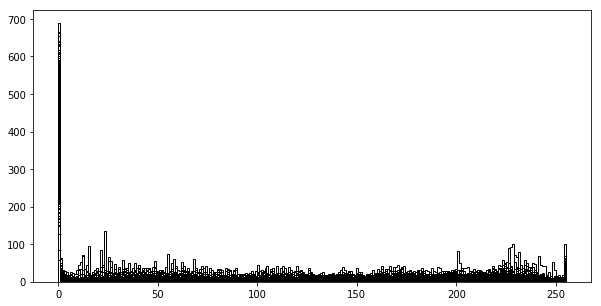

In [7]:
subset_1 = raw_data_train.iloc[:1000,1:]                 # Selects the first 1000 rows and all columns except the first one from the raw_data_train dataframe.

plt.subplots(figsize=(10,5))                             # Creates a new figure with a size of 10x5 inches.

plt.hist(subset_1, bins=256, fc='k', ec='k', histtype='step') # Plots a histogram for subset_1 with 256 bins, black face color, black edge color, and a step outline.

plt.show()                                               # Displays the histogram plot.


Let's visualise the first nine pictures in the raw training database. As each image is stored in a separate row we have to resize it from the flat array back to 28x28 array. Above each picture a abel will be displayed.

| Class |    Label    | Class |    Label   |
|:-----:|:-----------:|:-----:|:----------:|
|   1   | T-shirt/top |   6   |   Sandal   |
|   2   |   Trouser   |   7   |    Shirt   |
|   3   |   Pullover  |   8   |   Sneaker  |
|   4   |    Dress    |   9   |     Bag    |
|   5   |     Coat    |   10  | Ankle boot |

### Purpose:  
To analyze the distribution of pixel values across a subset of 1000 images using a histogram, revealing the overall intensity spread in the dataset.

### Why This Matters:  
Understanding pixel value distribution helps identify patterns, imbalances, or anomalies in the image data, which is essential for preprocessing and improving model performance. Using `histtype="step"` reduces computational overhead, making the process efficient for large datasets.

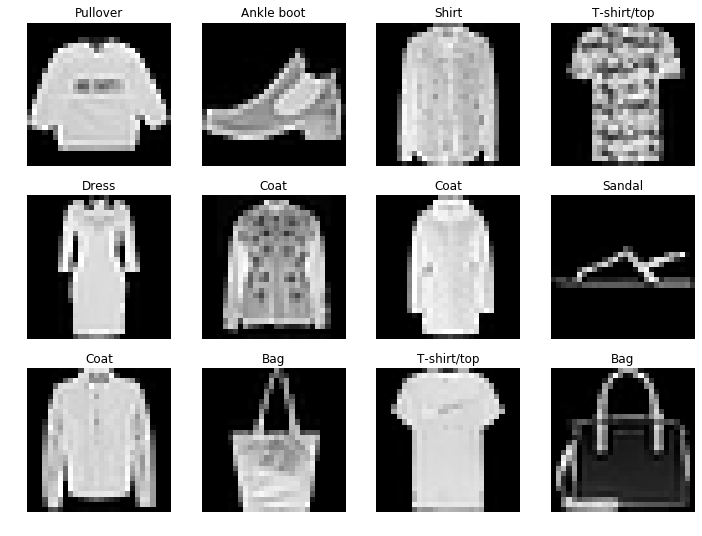

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # List of class names corresponding to image labels.

plt.figure(figsize=(12,9))                                          # Creates a new figure with a size of 12x9 inches.

for i in range(0,12):                                              # Loops through the first 12 images in the dataset.
    plt.subplot(3,4,i+1)                                           # Creates a grid of 3x4 subplots and selects the (i+1)-th subplot.
    image_resized = np.resize(raw_data_train.iloc[i,1:].values,(28,28))  # Resizes pixel values of the i-th image to 28x28 dimensions.
    plt.title(class_names[raw_data_train.iloc[i,0]])               # Sets the title of the subplot to the corresponding class name.
    plt.imshow(image_resized, cmap='gray', interpolation='none')   # Displays the image in grayscale without interpolation.
    plt.axis('off')                                                # Hides the axes for a cleaner display.


### Purpose:  
To visualize the first 12 images from the dataset along with their corresponding class names, giving an intuitive understanding of the data structure.

### Why This Matters:  
Visualizing the images helps verify that the data is correctly labeled and formatted. This step is crucial for debugging preprocessing issues and building confidence in the dataset's quality before model training.

## <a id='2'>2. Preparing Data</a>

### In this chapter a basic preparation of data will be conducted.

### <a id='2.1'>2.1 Changing dataframe to numpy arrays</a>

The images' labels are stored in the first column of the dataframe. These data are categorical so we have to one-hot encode labels: we can do it either by using keras [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) or sklearn [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) functions.

In [9]:
X = np.array(raw_data_train.iloc[:, 1:])  # Converts all rows and columns except the first into a numpy array for input features.
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))  # Converts the first column (labels) into one-hot encoded format for output.


### Purpose:  
- **`X`**: Extracts the pixel intensity values (features) from the dataset for model input.  
- **`y`**: Transforms the categorical labels into one-hot encoded vectors for compatibility with machine learning algorithms.

### Why This Matters:  
- Converting data into numerical arrays ensures compatibility with most ML libraries.  
- One-hot encoding the labels is critical for classification tasks, enabling the model to predict probabilities for each class.

### <a id='2.2'>2.2 Splitting data into train and validation sets</a>

Sklearn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) will be used to perform this operation. In this case, it will be more like train-validation split as this validation set will be used during the compilation of the model. The real test set is given to us in a separate .csv file.

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

### <a id='2.3'>2.3 Reshaping and splitting data for Convolution Neural Network</a>

**Reshaping**: We have 28x28 pixels, black and white (1 channel only) pictures. Note that for a colored images we would have 3 channels (RGB).

**Splitting**: To build a well-functioning CNN model you have to follow a procedure of splitting your data into three sets: training, validation and test. In this case, I will create the validation set explicitly but if data are shuffled you can use simply *validation_split* parameter when fitting the model. More about how to create a validation set and why you need it is explained nicely on YouTube [here](https://www.youtube.com/watch?v=dzoh8cfnvnI&feature=youtu.be).

In [12]:
im_rows, im_cols = 28, 28                                # Defines the dimensions of each image (28x28 pixels).
input_shape = (im_rows, im_cols, 1)                      # Specifies the input shape for grayscale images (28x28 with 1 channel).

# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])             # Converts pixel data from the test set into a numpy array.
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0])) # Converts test labels into one-hot encoded format.

# Train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1) # Reshapes training data into 4D format for CNN input.
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1) # Reshapes validation data into 4D format for CNN input.
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)    # Reshapes test data into 4D format for CNN input.

# Normalisation
X_train = X_train/255                                      # Normalizes training data by scaling pixel values to the range [0, 1].
X_validate = X_validate/255                                # Normalizes validation data similarly.
X_test = X_test/255                                        # Normalizes test data similarly.

print("X_train shape:", X_train.shape)                    # Prints the shape of the training data.
print("X_validate shape:", X_validate.shape)              # Prints the shape of the validation data.
print("X_test shape:", X_test.shape)                      # Prints the shape of the test data.
print("y_train shape:", y_train.shape)                    # Prints the shape of the training labels.
print("y_validate shape:", y_validate.shape)              # Prints the shape of the validation labels.
print("y_test shape:", y_test.shape)                      # Prints the shape of the test labels.


X_train shape: (48000, 28, 28, 1)
X_validate shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (48000, 10)
y_validate shape: (12000, 10)
y_test shape: (10000, 10)



### Purpose:  
1. Prepares image data (training, validation, and test sets) for a Convolutional Neural Network (CNN) by reshaping and normalizing.  
2. Ensures all label data is in a one-hot encoded format.

### Why This Matters:  
- **Reshaping**: Makes the data compatible with CNNs, which expect 4D input for processing image dimensions and channels.  
- **Normalization**: Improves model performance and convergence speed by scaling pixel values to a uniform range.  
- **Shape Printing**: Confirms that data preparation steps were applied correctly, ensuring no mismatched dimensions.

## <a id='3'>3. Building CNN</a>

In this chapter the CNN model will be built and run.

### <a id='3.1'>3.1 Importing necessary modules</a>

In [14]:
import keras                                              # Imports the main Keras library for building and training deep learning models.
from keras.models import Sequential                      # Imports the Sequential model, which allows stacking layers in a linear fashion.
from keras.layers import Dropout, Flatten, AveragePooling2D # Imports layers for regularization, flattening data, and pooling operations.
from keras.layers import Dense, Conv2D                   # Imports Dense (fully connected) and Conv2D (convolutional) layer types.
from keras.layers.normalization import BatchNormalization # Imports BatchNormalization for stabilizing and accelerating training.



### <a id='3.2'>3.2 Defining the CNN architecture - LeNET</a>

LeNet architecture does not contain dropouts or max pooling operations which are common in modern architectures. 

A **max pooling** layer reduces the number of parameters in the layer by extracting the maximum value from a "patch" of a specified size (e.g. 2X2 pixels) and reducing layers size in such a way. There are also option to use the minimum value or the average one.

A **dropout** operation "kills" specified percentage of neurons (units) on a given layer to prevent overfitting.
In order to prevent overfitting, you can also use a Batch Normalisation but it is not recommended to use dropouts and batch normalisation in a single model. This is so-called "disharmony" of dropout and batch normalization.

In [15]:
num_classes = 10                                         # Defines the number of output classes (10 classes for classification).

model = Sequential()                                     # Initializes a Sequential model to stack layers sequentially.

model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))) 
                                                         # Adds a 2D convolutional layer with 6 filters, 3x3 kernel size, ReLU activation, and input shape for grayscale images.

model.add(AveragePooling2D())                            # Adds an average pooling layer to downsample feature maps.

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu')) 
                                                         # Adds another 2D convolutional layer with 16 filters, 3x3 kernel size, and ReLU activation.

model.add(AveragePooling2D())                            # Adds another average pooling layer to further reduce spatial dimensions.

model.add(Flatten())                                     # Flattens the output of the previous layer into a 1D array for the dense layers.

model.add(Dense(120, activation='relu'))                 # Adds a dense (fully connected) layer with 120 units and ReLU activation.

model.add(Dense(84, activation='relu'))                  # Adds another dense layer with 84 units and ReLU activation.

model.add(Dense(num_classes, activation='softmax'))      # Adds the final output layer with 10 units (one per class) and softmax activation for probabilities.



### Purpose:  
To define a Convolutional Neural Network (CNN) architecture for classifying images into 10 categories.

### Why This Matters:  
- **Convolutional Layers**: Extract spatial features and patterns from the input images.  
- **Pooling Layers**: Reduce feature map size, improving computational efficiency and reducing overfitting.  
- **Dense Layers**: Learn complex representations and perform classification.  
- **Softmax Activation**: Converts outputs into probabilities for multi-class classification.

### <a id='3.3'>3.3 Compiling model</a>



In [16]:
model.compile(optimizer="adam",                           # Configures the Adam optimizer for efficient and adaptive learning.
              loss="categorical_crossentropy",            # Sets the loss function for multi-class classification.
              metrics=["accuracy"])                       # Specifies accuracy as the evaluation metric.



### Purpose:  
To configure the CNN model for training by specifying the optimizer, loss function, and evaluation metrics.

### Why This Matters:  
- **Adam Optimizer**: Combines the benefits of adaptive learning rates and momentum for faster convergence.  
- **Categorical Crossentropy**: Measures the difference between predicted probabilities and true labels in multi-class classification.  
- **Accuracy Metric**: Tracks how well the model predicts the correct classes during training and evaluation.

### <a id='3.4'>3.4 Summarising model</a>

It is worth to summarise the model to see how many trainable parameters our model contains - this has a direct impact on computational power required.

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

### <a id='3.5'>3.5 Fitting model to training data</a>

After the model was checked it is time to fit it to the training data. I will store the fitted model in *tracker* variable to later investigate its history.

In [20]:
tracker = model.fit(X_train, y_train,                        # Trains the model using the training data and labels.
                    batch_size=512,                          # Processes 512 samples per gradient update.
                    epochs=20,                              # Trains the model for 100 complete passes over the training data.
                    validation_data=(X_validate, y_validate),# Uses validation data to monitor model performance during training.
                    verbose=1)                               # Suppresses detailed output during training (silent mode).


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2665 - acc: 0.9024 - val_loss: 0.3256 - val_acc: 0.8803
Epoch 2/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2635 - acc: 0.9036 - val_loss: 0.3242 - val_acc: 0.8793
Epoch 3/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2580 - acc: 0.9057 - val_loss: 0.3156 - val_acc: 0.8839
Epoch 4/20
48000/48000 [==============================] - 1s 13us/step - loss: 0.2590 - acc: 0.9051 - val_loss: 0.3262 - val_acc: 0.8791
Epoch 5/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2568 - acc: 0.9062 - val_loss: 0.3194 - val_acc: 0.8838
Epoch 6/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2539 - acc: 0.9054 - val_loss: 0.3156 - val_acc: 0.8830
Epoch 7/20
48000/48000 [==============================] - 1s 12us/step - loss: 0.2456 - acc: 0.9096 - val_loss: 0.3245 - val_acc


### Purpose:  
To train the CNN model using the training dataset and evaluate its performance on the validation dataset after each epoch.

### Why This Matters:  
- **Batch Size**: Balances memory usage and convergence speed.  
- **Epochs**: Ensures sufficient training cycles for the model to learn.  
- **Validation Data**: Monitors overfitting and ensures the model generalizes well.  
- **`verbose=0`**: Keeps the training process output minimal for cleaner logs.

### <a id='3.6'>3.6 Evaluating model with a test data</a>

Now the model will be evaluated on test sets.

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)

In [22]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2983594947099686
Test accuracy: 0.8959


## <a id='4'>4. Tracking Learning</a>

It is possible to monitor the learning process of our model by accessing its history with *.history* attribute of previously defined *tracker*. It is worth looking at how the loss function was developing for both testing and validation sets. It is possible to spot if we have already a problem with overfitting - test set loss function will be decreasing while validation's loss function after reaching a minimum value starts to increase again.

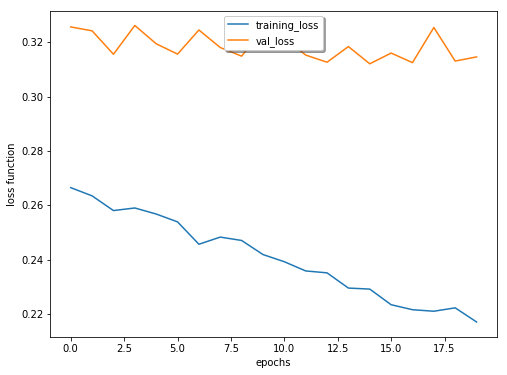

In [23]:
fig, ax = plt.subplots(figsize = (8,6))                    # Creates a new figure and axes object with a size of 8x6 inches.
ax.plot(tracker.history["loss"], label = "training_loss")  # Plots the training loss over epochs using data from the training history.
ax.plot(tracker.history["val_loss"], label = "val_loss")  # Plots the validation loss over epochs using data from the validation history.
plt.xlabel("epochs")                                       # Sets the label for the x-axis to indicate epochs.
plt.ylabel("loss function")                                # Sets the label for the y-axis to indicate the loss function.
ax.legend(loc = 'upper center', shadow = True,)            # Adds a legend at the top center with a shadow effect.
plt.show()                                                 # Displays the plot.



### Purpose:  
To visualize the training and validation loss over epochs, enabling an understanding of model performance during training.

### Why This Matters:  
- **Loss Visualization**: Helps assess whether the model is learning effectively or overfitting.  
- **Training vs. Validation**: Identifies discrepancies between training and validation performance to fine-tune the model.  
- **Plotting**: Provides an intuitive and quick way to interpret the training process.

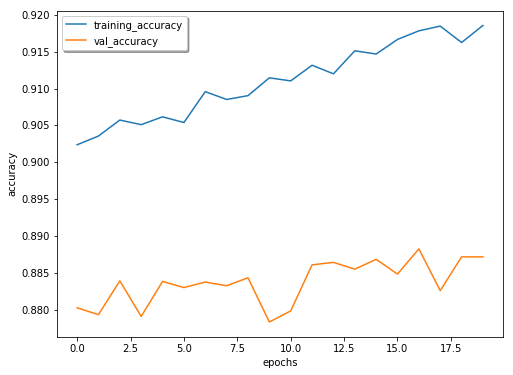

In [24]:
fig, ax = plt.subplots(figsize=(8,6))                         # Creates a new figure and axes object with a size of 8x6 inches.
ax.plot(tracker.history["acc"], label = "training_accuracy")  # Plots the training accuracy over epochs from the training history.
ax.plot(tracker.history["val_acc"], label = "val_accuracy")  # Plots the validation accuracy over epochs from the validation history.
plt.xlabel("epochs")                                          # Sets the label for the x-axis to indicate epochs.
plt.ylabel("accuracy")                                        # Sets the label for the y-axis to indicate accuracy.
ax.legend(loc = 'best', shadow = True,)                       # Adds a legend at the best position with a shadow effect.
plt.show()                                                    # Displays the plot.



### Purpose:  
To visualize how the training and validation accuracy evolve over epochs, showing how well the model is learning.

### Why This Matters:  
- **Accuracy Tracking**: Evaluates the model's classification performance during training and validation.  
- **Training vs. Validation Trends**: Highlights overfitting or underfitting issues.  
- **Performance Assessment**: Determines if the model is converging toward better accuracy with each epoch.